<a href="https://colab.research.google.com/github/abhisriv-466/Sentiment-analysis-on-tweets/blob/main/Sentiment_Analysis_on_twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Preprocessing

In [ ]:
!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df=pd.read_csv('/content/Tweet_data.csv')
df

,TimeStamps,Tweets
0,2023-08-26T13:02:31.000Z,ITC Demerger - Why did it happen? \n\nhttps://...
1,2023-08-26T11:34:17.000Z,Hotels Demerger: How Positive Will It Be For I...
2,2023-08-25T15:47:21.000Z,ITC was running in expectation of the demerger...
3,2023-08-25T09:24:23.000Z,Is there any opportunity in such scenarios? IT...
4,2023-08-21T12:17:11.000Z,Decoding the ITC Demerger Share Entitlement Ra...
...,...,...
203,2023-07-25T12:10:00.000Z,The demerger ratio announced is not quite favo...
204,2023-07-25T12:08:19.000Z,Some Numbers on Demerger of ITC's Hotel Busine...
205,2023-07-25T12:03:12.000Z,ITC Share Price Falls as Investors Disappointe...
206,2023-07-25T11:58:42.000Z,ITC Share Price Falls as Investors Disappointe...


In [ ]:
df['TimeStamps'] = df['TimeStamps'].str[:10]
df[['Year', 'Month', 'Date']] = df['TimeStamps'].str.split('-', expand=True)

In [ ]:
df.drop('TimeStamps',axis=1)

,Tweets,Year,Month,Date
0,ITC Demerger - Why did it happen? \n\nhttps://...,2023,08,26
1,Hotels Demerger: How Positive Will It Be For I...,2023,08,26
2,ITC was running in expectation of the demerger...,2023,08,25
3,Is there any opportunity in such scenarios? IT...,2023,08,25
4,Decoding the ITC Demerger Share Entitlement Ra...,2023,08,21
...,...,...,...,...
203,The demerger ratio announced is not quite favo...,2023,07,25
204,Some Numbers on Demerger of ITC's Hotel Busine...,2023,07,25
205,ITC Share Price Falls as Investors Disappointe...,2023,07,25
206,ITC Share Price Falls as Investors Disappointe...,2023,07,25


In [ ]:
for i in range(5):
    print(df.loc[i, 'Tweets'])

ITC Demerger - Why did it happen? 

https://instagram.com/p/CwaJyrEMfOu/?utm_source=ig_web_copy_link&igshid=MzRlODBiNWFlZA==…

#stockmarkets #stockmarketeducation #stockmarkettips #commodity #commoditytrading #nseindia #bseinda #goldtrading #sarafa #marketupdate #crudeoil #naturalgas #stockmarketindia #nse #bse #banknifty #nifty
Hotels Demerger: How Positive Will It Be For ITC? - Nice article from R&R

https://blog.researchandranking.com/itc-hotels-after-demerger/…
@ITCCorpCom
 @ITCHotels
 @dmuthuk
 @researchandrank
ITC was running in expectation of the demerger announcement. Once the the demerger is actually announced, it has started falling. And continuously falling since then. 
Is there any opportunity in such scenarios? ITC and hotels demerger will create a similar scenario. The obvious one is to sit tight and let it bottom out.
Decoding the ITC Demerger Share Entitlement Ratio #shorts #shortsfeed  #... https://youtu.be/hwzvrgDmTN4 via 
@YouTube


In [ ]:
# Download NLTK stopwords if you haven't already
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean and preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)

    #Lowercasing the text
    cleaned_text = cleaned_text.lower()

    return cleaned_text

# Apply the preprocessing function to the "Tweet" column
df['Cleaned_Tweet'] = df['Tweets'].apply(preprocess_text)

# Print the cleaned DataFrame
df[['Tweets', 'Cleaned_Tweet']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Tweets,Cleaned_Tweet
0,ITC Demerger - Why did it happen? \n\nhttps://...,itc demerger happen stockmarkets stockmarketed...
1,Hotels Demerger: How Positive Will It Be For I...,hotels demerger positive itc nice article r r ...
2,ITC was running in expectation of the demerger...,itc running expectation demerger announcement ...
3,Is there any opportunity in such scenarios? IT...,opportunity scenarios itc hotels demerger crea...
4,Decoding the ITC Demerger Share Entitlement Ra...,decoding itc demerger share entitlement ratio ...
...,...,...
203,The demerger ratio announced is not quite favo...,demerger ratio announced quite favorable exist...
204,Some Numbers on Demerger of ITC's Hotel Busine...,numbers demerger itc hotel business hotels bus...
205,ITC Share Price Falls as Investors Disappointe...,itc share price falls investors disappointed d...
206,ITC Share Price Falls as Investors Disappointe...,itc share price falls investors disappointed d...


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
def convert_example_to_feature(review):
  return tokenizer.encode_plus(review,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
# can be up to 512 for BERT
max_length = 512
batch_size = 6

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode_examples(ds, limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  if (limit > 0):
      ds = ds.take(limit)
  for review, label in tfds.as_numpy(ds):
    bert_input = convert_example_to_feature(review.decode())
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews',
          split = (tfds.Split.TRAIN, tfds.Split.TEST),
          as_supervised=True,
          with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW58OL1/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW58OL1/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW58OL1/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# train dataset
ds_train_encoded = encode_examples(ds_train).shuffle(10000).batch(batch_size)
# test dataset
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# we will do just 1 epoch, though multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1
# model initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_test_encoded)

4167/4167 [==============================] - 4146s 982ms/step - loss: 0.2390 - accuracy: 0.9051 - val_loss: 0.1604 - val_accuracy: 0.9407


In [ ]:
i=0
for sentence in df['Cleaned_Tweet']:

  predict_input = tokenizer.encode(sentence,

  truncation=True,

  padding=True,

  return_tensors="tf")
  tf_output = model.predict(predict_input)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1)
  labels = ['Negative','Positive'] #(0:negative, 1:positive)
  label = tf.argmax(tf_prediction, axis=1)
  label = label.numpy()
  df.loc[i,'Sentiment']=labels[label[0]]
  i+=1

1/1 [==============================] - 0s 72ms/step


In [ ]:
df

,TimeStamps,Tweets,Year,Month,Date,Cleaned_Tweet,Sentiment
0,2023-08-26,ITC Demerger - Why did it happen? \n\nhttps://...,2023,08,26,itc demerger happen stockmarkets stockmarketed...,Positive
1,2023-08-26,Hotels Demerger: How Positive Will It Be For I...,2023,08,26,hotels demerger positive itc nice article r r ...,Positive
2,2023-08-25,ITC was running in expectation of the demerger...,2023,08,25,itc running expectation demerger announcement ...,Negative
3,2023-08-25,Is there any opportunity in such scenarios? IT...,2023,08,25,opportunity scenarios itc hotels demerger crea...,Negative
4,2023-08-21,Decoding the ITC Demerger Share Entitlement Ra...,2023,08,21,decoding itc demerger share entitlement ratio ...,Negative
...,...,...,...,...,...,...,...
203,2023-07-25,The demerger ratio announced is not quite favo...,2023,07,25,demerger ratio announced quite favorable exist...,Positive
204,2023-07-25,Some Numbers on Demerger of ITC's Hotel Busine...,2023,07,25,numbers demerger itc hotel business hotels bus...,Positive
205,2023-07-25,ITC Share Price Falls as Investors Disappointe...,2023,07,25,itc share price falls investors disappointed d...,Negative
206,2023-07-25,ITC Share Price Falls as Investors Disappointe...,2023,07,25,itc share price falls investors disappointed d...,Negative


In [ ]:
df.to_csv("Tweets_sentiments.csv")

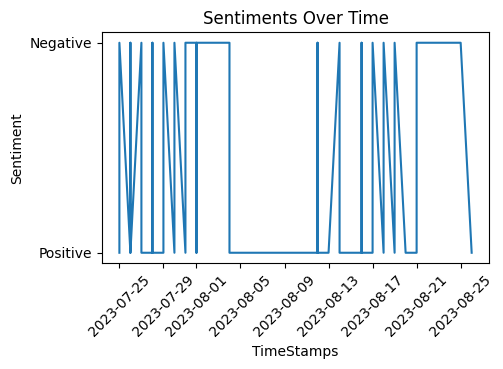

In [ ]:
df['TimeStamps'] = pd.to_datetime(df['TimeStamps'])

# Sort the DataFrame by Timestamp in increasing order
df.sort_values(by='TimeStamps', inplace=True)

# Plotting sentiments over time
plt.figure(figsize=(5, 3))
plt.plot(df['TimeStamps'], df['Sentiment'])
plt.xlabel('TimeStamps')
plt.ylabel('Sentiment')
plt.title('Sentiments Over Time')
# plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the fine-tuned BERT model
model.save('/content/gdrive/MyDrive/bert_sentiment_model')

FailedPreconditionError: ignored